In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import astropy 
#from astropy import units as u
#from astropy import constants as const

%matplotlib inline 
#for jupyter notebook

In [2]:
filename = "cosmolike_interface/covariances_WFIRST_SO_gold_prec.txt"
filename_nearest = "cosmolike_interface/covariances_WFIRST_SO_gold_prec_nearest.txt"

cov = np.loadtxt(filename)
cov_nearest = np.loadtxt(filename_nearest)

df = pd.DataFrame(cov)
df_nearest = pd.DataFrame(cov_nearest)


In [3]:
cov_log = np.log10(cov)
cov_nearest_log = np.log10(cov_nearest)


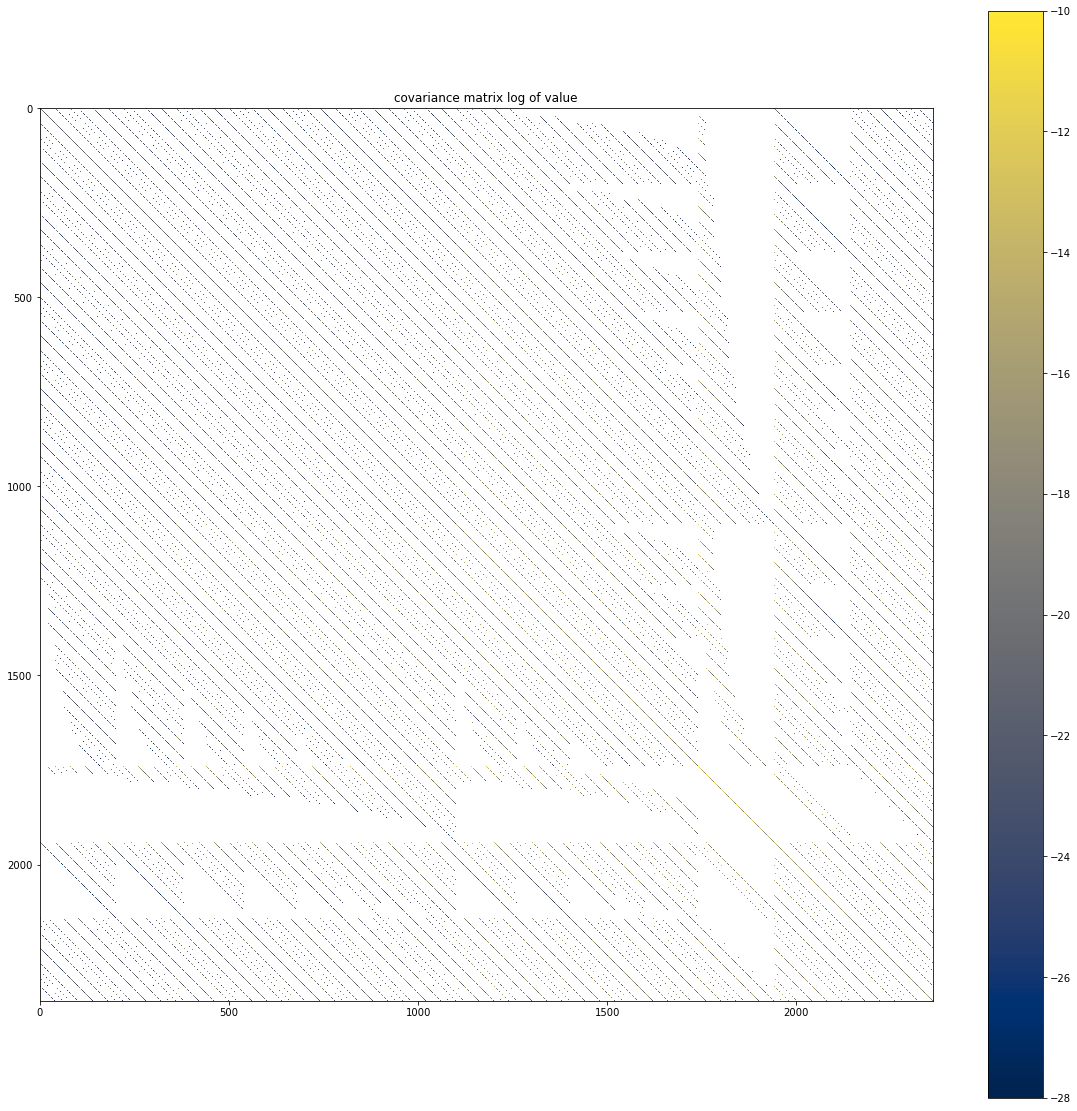

In [4]:
plt.figure(figsize=(20,20))
#plt.matshow(cov_log, interpolation='nearest')
plt.imshow(cov_log, interpolation='nearest', cmap="cividis")


plt.colorbar()
plt.title("covariance matrix log of value")
plt.clim(-28,-10)
##plt.savefig("cosmolike_interface/cov.pdf")

In [5]:
np.allclose(cov, cov.T, rtol=1e-10)

True

In [6]:
np.linalg.cholesky(cov)

LinAlgError: Matrix is not positive definite

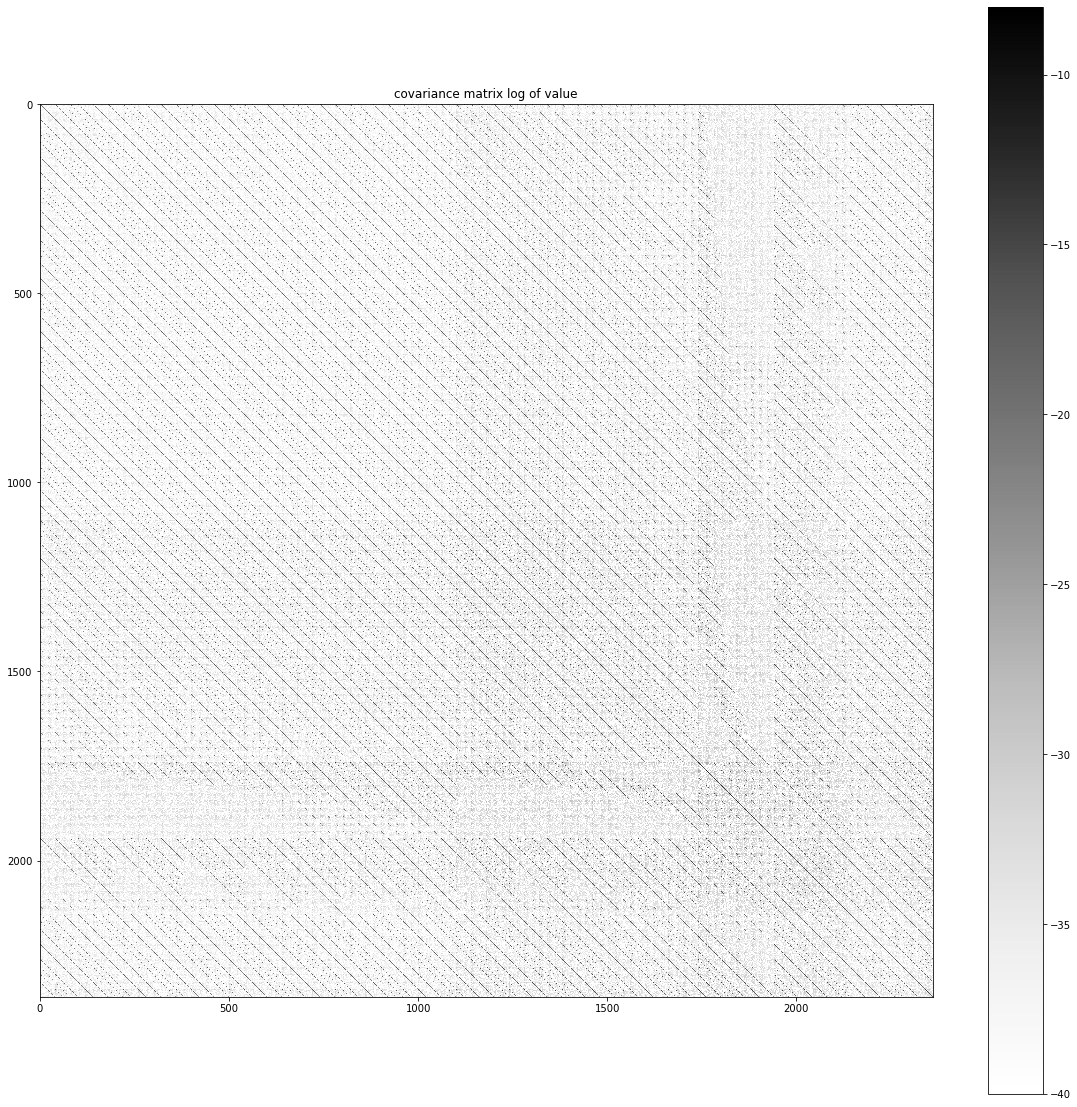

In [25]:
plt.figure(figsize=(20,20))
#plt.matshow(cov_log, interpolation='nearest')
plt.imshow(cov_nearest_log, interpolation='nearest', cmap="Greys")


plt.colorbar()
plt.title("covariance matrix log of value")
plt.clim(-40,-8)
##plt.savefig("cosmolike_interface/cov.pdf")

Text(0.5, 1.05, 'covariance matrix log of value')

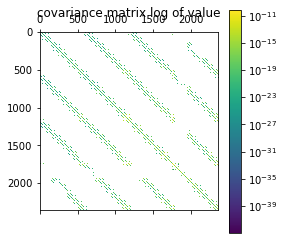

In [21]:


import matplotlib as mpl
#plt.figure(figsize=(20,20))
plt.matshow(cov_nearest, norm=mpl.colors.LogNorm())
plt.colorbar()
plt.title("covariance matrix log of value")
#plt.clim(-28,-10)

In [17]:
cov_nearest

array([[ 7.01427187e-19,  1.88653631e-34, -1.05513897e-35, ...,
        -1.30440949e-34,  1.51922142e-34,  2.02168539e-34],
       [ 1.88653631e-34,  3.16313125e-19, -1.61201625e-33, ...,
         5.14259108e-36,  6.17933939e-37,  2.16465885e-35],
       [-1.05513897e-35, -1.61201625e-33,  1.46364269e-19, ...,
        -2.32181985e-36,  1.94205857e-35,  1.10266361e-35],
       ...,
       [-1.30440949e-34,  5.14259108e-36, -2.32181985e-36, ...,
         6.38405367e-19,  2.04862883e-34,  1.20681179e-34],
       [ 1.51922142e-34,  6.17933939e-37,  1.94205857e-35, ...,
         2.04862883e-34,  6.67847956e-19,  5.28097017e-35],
       [ 2.02168539e-34,  2.16465885e-35,  1.10266361e-35, ...,
         1.20681179e-34,  5.28097017e-35,  1.29960387e-18]])

In [18]:
cov_nearest_log

array([[-18.15401741, -33.72433483,          nan, ...,          nan,
        -33.81837892, -33.69428643],
       [-33.72433483, -18.49988279,          nan, ..., -35.28881801,
        -36.20905795, -34.66461054],
       [         nan,          nan, -18.83456493, ...,          nan,
        -34.71173768, -34.95755696],
       ...,
       [         nan, -35.28881801,          nan, ..., -18.19490347,
        -33.68853672, -33.91836046],
       [-33.81837892, -36.20905795, -34.71173768, ..., -33.68853672,
        -18.1753224 , -34.27728629],
       [-33.69428643, -34.66461054, -34.95755696, ..., -33.91836046,
        -34.27728629, -17.886189  ]])

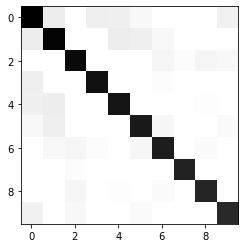

In [23]:
plt.imshow(cov_nearest_log[:10,:10], interpolation='nearest', cmap="Greys")

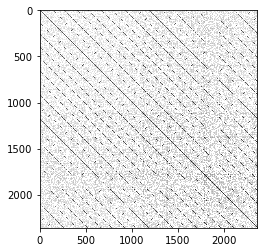

In [24]:
plt.imshow(cov_nearest_log, interpolation='nearest', cmap="Greys")


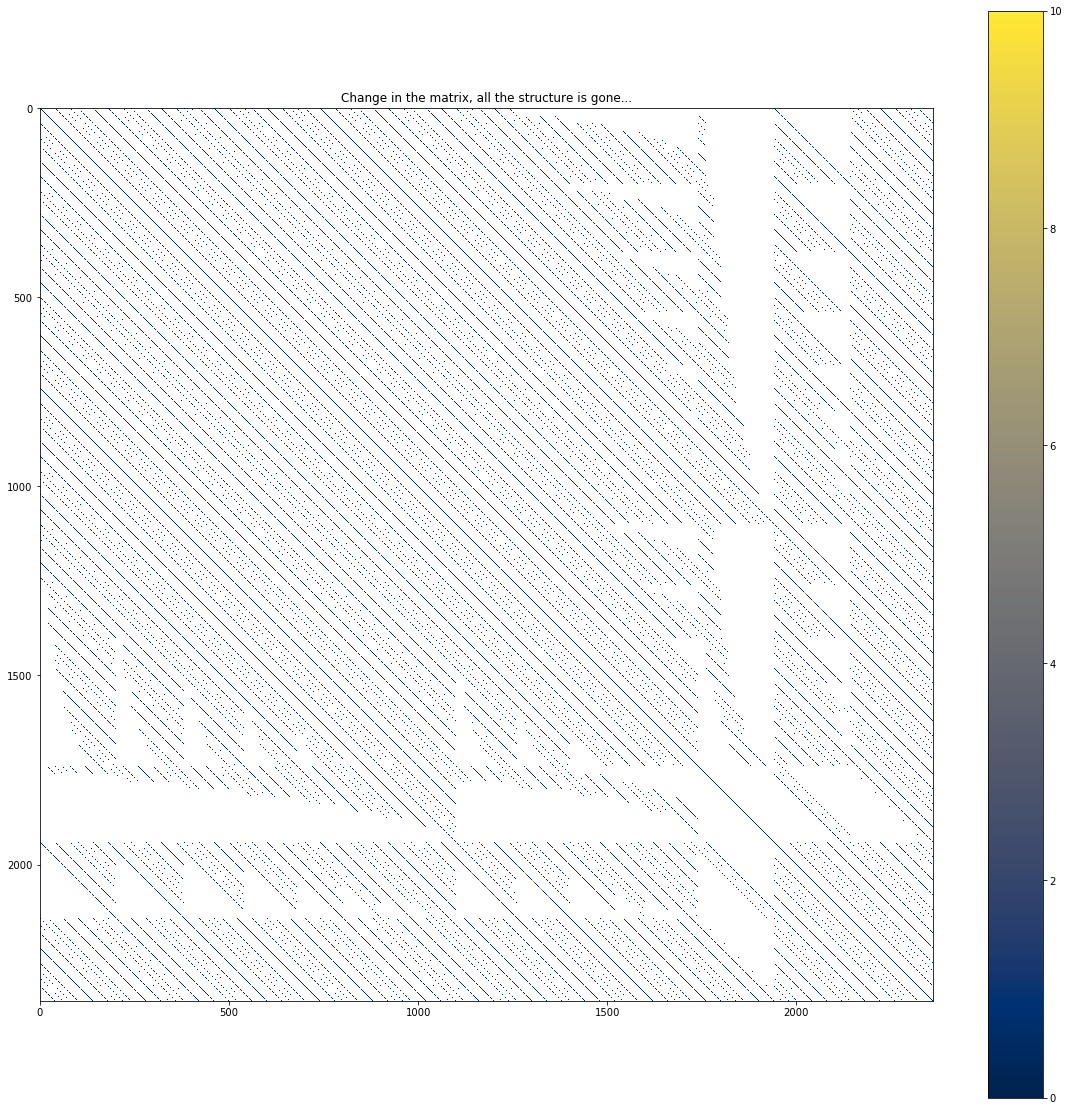

In [45]:

plt.figure(figsize=(20,20))
#plt.matshow(cov_log, interpolation='nearest')
plt.imshow(((cov-cov_nearest)/cov), interpolation='nearest', cmap="cividis")


plt.colorbar()
plt.title("Change in the matrix, all the structure is gone...")
plt.clim(0,10)

In [35]:
#symmetric?
np.allclose(cov_nearest, cov_nearest.T, rtol=1e-10)

True

In [31]:
np.linalg.cholesky(cov_nearest)

array([[ 8.37512499e-10,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 2.25254705e-25,  5.62417216e-10,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.25984863e-26, -2.86622849e-24,  3.82575834e-10, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-1.55748063e-25,  9.14372985e-27, -6.06891402e-27, ...,
         7.84741370e-10,  0.00000000e+00,  0.00000000e+00],
       [ 1.81396866e-25,  1.09871092e-27,  5.07627088e-26, ...,
        -2.59818833e-24,  8.09375937e-10,  0.00000000e+00],
       [ 2.41391668e-25,  3.84884885e-26,  2.88220926e-26, ...,
         3.00404866e-25,  1.86808467e-25,  1.13568617e-09]])

Text(0.5, 1.05, 'covariance matrix shear two bin combos')

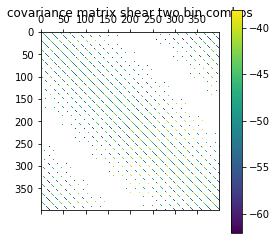

In [11]:
plt.matshow(cov_log[0:400, 0:400], interpolation='nearest')
plt.colorbar()
plt.title("covariance matrix shear two bin combos")

In [7]:
np.mean(cov)

8.925374954781296e-17

In [8]:
new_cov = np.zeros(cov.shape)
new_cov[np.diag_indices(cov.shape[0])] = cov[np.diag_indices(cov.shape[0])] 

In [9]:
new_cov[np.diag_indices(cov.shape[0])]

array([7.013120e-19, 3.162590e-19, 1.463474e-19, ..., 6.384002e-19,
       6.678450e-19, 1.299603e-18])

Text(0.5, 1.05, 'double check it is diagonal now')

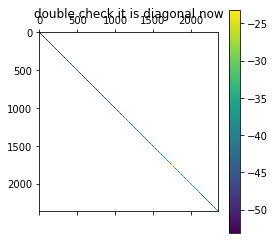

In [10]:
plt.matshow(np.log(new_cov), interpolation='nearest')
plt.colorbar()
plt.title("double check it is diagonal now")


In [11]:
np.savetxt("cosmolike_interface/covariances_WFIRST_SO_gold_diagonal.txt",new_cov)

In [12]:
np.linalg.cholesky(cov)

LinAlgError: Matrix is not positive definite

In [24]:
np.linalg.inv(cov)

array([[4.58452426e+18, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 8.17353742e+18, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.43617996e+19, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.59197956e+18, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.51002434e+18, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 7.71884582e+17]])

In [25]:
 np.all(np.linalg.eigvals(cov) > 0)

False

In [26]:
np.sum(np.linalg.eigvals(cov) < 0)

20

In [27]:
np.where(np.linalg.eigvals(cov) < 0)

(array([ 382,  430,  485,  565,  640,  729,  767,  820,  823,  874,  919,
         931,  951, 1002, 1081, 1117, 1146, 1227, 1293, 1438], dtype=int64),)

In [28]:
np.linalg.eigvals(cov)[np.where(np.linalg.eigvals(cov) < 0 )]

array([-9.16581521e-17, -4.29741398e-17, -1.73529684e-17, -6.19785866e-18,
       -2.03897426e-18, -6.63825061e-19, -3.89122899e-19, -2.17675772e-19,
       -1.99672839e-19, -9.82270248e-20, -5.24349237e-20, -4.56858822e-20,
       -3.78453666e-20, -2.45796041e-20, -1.23786287e-20, -9.70245154e-21,
       -8.06964546e-21, -3.57391962e-21, -2.04295646e-21, -4.00556995e-22])

(-1e-17, 1e-17)

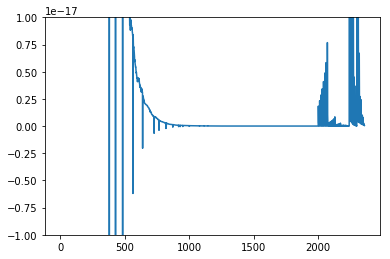

In [29]:
plt.plot(range(cov.shape[0]),np.linalg.eigvals(cov))
plt.ylim(-10e-18, 10e-18)
#plt.yscale("log")

In [30]:
a = np.where(cov < 0)


In [31]:

print(np.array_str(cov[380:385,380:385], precision=2))

[[1.46e-17 0.00e+00 0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 6.15e-18 0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 2.53e-18 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00 1.02e-18 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00 0.00e+00 4.02e-19]]


Text(0.5, 1.05, 'covariance matrix negative values')

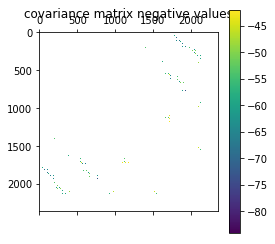

In [32]:
plt.matshow(np.log(np.where(cov<0, -cov, 0)), interpolation='nearest')
plt.colorbar()
plt.title("covariance matrix negative values")

negative values cluster in lower and right part

shear and shear cmb kappa lead to these


In [33]:
np.linalg.cholesky(cov[0:1500,0:1500])

array([[8.37443729e-10, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 5.62369096e-10, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 3.82553787e-10, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        7.94514883e-11, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 5.32703670e-11, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 3.59813424e-11]])

In [34]:
np.linalg.cholesky(cov[0:1500,0:1500])

array([[8.37443729e-10, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 5.62369096e-10, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 3.82553787e-10, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        7.94514883e-11, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 5.32703670e-11, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 3.59813424e-11]])

In [5]:
np.linalg.cholesky(cov[0:1500,0:1500])

array([[8.37443729e-10, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 5.62369096e-10, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 3.82553787e-10, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        7.94514883e-11, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 5.32703670e-11, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 3.59813424e-11]])

In [6]:
np.sum(np.linalg.eigvals(cov[0:1939,0:1939]) < 0)

19

/home/lukas/anaconda3/envs/cosmology/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


Text(0.5, 1.05, 'covariance matrix negative values')

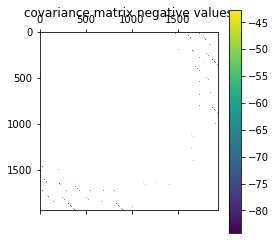

In [7]:
plt.matshow(np.log(np.where(cov[0:1939,0:1939]<0, -cov[0:1939,0:1939], 0)), interpolation='nearest')
plt.colorbar()
plt.title("covariance matrix negative values")

In [30]:
np.allclose(cov, cov.T, 1e-58)

True

In [31]:
np.linalg.slogdet(cov)

(1.0, -102466.31876669571)